# Semaine 11 - Réseau de neurones de base

Cette semaine nous allons écrire un réseau de neurones de base, que nous allons entraîner afin qu'il inverse des séquences de bits. Si vous réussissez à l'implémenter, vous pourrez ensuite vous amuser à l'utiliser sur d'autres types de données

## Importations et initialisations de variables

Nous n'allons utiliser que numpy pour cet exercice

In [425]:
import numpy as np

Nous avons un réseau à deux couches (l'input ne comptant pas pour une couche). Nous allons utiliser 300 séquences de bits pour l'entraînement.

In [426]:
# Nb de neurones sur chaque couche
n_in = 10
n_hidden = 100
n_out = 10

# Nb de 'training examples'
m = 300

In [427]:
alpha = 0.5  # Learning rate
epochs = 500  # nb iterations du gradient descent

## Définition des fonctions d'activation

Nous utiliserons la fonction tanh pour l'activation de la "hidden layer", et la sigmoïde pour la dernière couche. Implémentez-les si elle n'existent pas déjà dans numpy. Implémentez aussi la dérivée de l'une ou l'autre d'entre elles, le cas échéant.
Attention! Les fonctions doivent pouvoir traiter des vecteurs ou des matrices en effectuant l'opération sur chaque élément de ces derniers.

In [428]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x))

In [429]:
# Dérivée de tanh
def tanh_prime(x):
    return 1 - np.tanh(x)

## Entraînement du réseau de neurones

Nous allons écrire une fonction qui fait une activation puis une rétropropagation, puis renvoie l'erreur (loss) et le gradient (toutes ces variables qui commencent par d...). L'itération sur les 200 epochs se fera dans un deuxième temps.

In [430]:
def train(X, Y, W1, W2, b1, b2):
    loss_history = []
    
    for epoch in range(epochs):
        # Forward
        # First layer
        Z1 = np.add(np.dot(W1, X), b1)
        A1 = np.tanh(Z1)
        # Second layer
        Z2 = np.add(np.dot(W2, A1), b2)
        A2 = sigmoid(Z2)
        
        # Backward
        dZ2 = A2 - Y
        dW2 = (1/m) * np.dot(dZ2, A1.T)
        db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
        
        dZ1 = np.multiply(np.dot(W2.T, dZ2), tanh_prime(Z1))
        dW1 = (1/m) * np.dot(dZ1, X.T)
        db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

        # Parameter update (use the learning rate alpha here!)
        W1 -= alpha * dW1
        W2 -= alpha * dW2
        b1 -= alpha * db1
        b2 -= alpha * db2
    
        # Compute loss
        loss = np.mean(-np.add(
            np.multiply(
                Y,
                np.log(A2)
            ),
            np.multiply(
                np.subtract(1, Y),
                np.log(np.subtract(1, A2))
            )
        ))
        
        loss_history.append(loss)
#         print("Epoch %d, Loss: %.8f" % (epoch, loss))
    
    return loss_history, W1, W2, b1, b2

### Initialisation des paramètres du réseau

Attention, certains paramètres sont initalisés à zéro, d'autres non...

In [431]:
W1 = np.random.randn(n_hidden, n_in) * 0.01
W2 = np.random.randn(n_out, n_hidden) * 0.01
b1 = np.zeros((n_hidden, 1))
b2 = np.zeros((n_out, 1))

## Génération des données d'entraînement

Ici il s'agit créer 300 séries de 10 chiffres binaires (1 et 0) pour les X.
Les Y seront ces mêmes séries, inversées.

In [432]:
# Data generation
X = np.random.binomial(1, 0.5, (n_in, m))
Y = X ^ 1

## Lancer l'entraînement du réseau

In [433]:
loss_history, W1, W2, b1, b2 = train(X, Y, W1, W2, b1, b2)

### Visualiser la décroissance de l'erreur sur un graphe (optionnel)

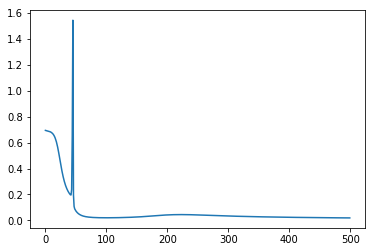

0.0197757574459


In [434]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.show()
print(loss_history[-1])

## Évaluation du réseau de neurones

Écrivez une petite fonction qui, à partir des activation de la dernière couche du réseau, produit un vecteur de 1 et de 0. Normalement il suffit de copier-coller quelque lignes de code et d'ajouter quelque chose à la fin. Attention, ici, contrairement à ce qu'on avait dans le MOOC, la dernière couche a 10 valeurs de sortie, et non pas une seule.

In [435]:
def oneorzero(x):
    if x > 0.5 :
        return 1
    else :
        return 0
    
oneorzero = np.vectorize(oneorzero)

def predict(X, W1, W2, b1, b2):
    # First layer
    Z1 = np.add(np.dot(W1, X), b1)
    A1 = np.tanh(Z1)
    # Second layer
    Z2 = np.add(np.dot(W2, A1), b2)
    A2 = oneorzero(sigmoid(Z2))
    return A2
    

### Tester la performance sur un seul exemple
Ici on génère un seul exemple (une série de 10 chiffres binaires), puis on fait prédire son inversion.

In [436]:
X = np.random.binomial(1, 0.5, (n_in,1))
print(X.T)
print(predict(X, W1, W2, b1, b2).T)

[[0 0 0 0 0 1 0 1 1 1]]
[[1 1 1 1 1 0 1 0 0 0]]


### Tester la performance sur une série d'exemples